In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import h5py
import numpy as np
# import jax
# import jax.numpy as jnp
# import haiku as hk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

np.random.seed(8)
tf.random.set_seed(8)

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
f = h5py.File('/clusterfs/ml4hep/mfong/transfer_learning/delphes_train.h5', 'r')
f2 = h5py.File('/clusterfs/ml4hep/mfong/transfer_learning/delphes_test.h5', 'r')

In [4]:
feature_keys = ['fjet_clus_eta', 'fjet_clus_phi', 'fjet_clus_pt']
for k in f.keys():
    print(k, f[k].shape)

fjet_clus_E (4000068, 200)
fjet_clus_eta (4000068, 200)
fjet_clus_phi (4000068, 200)
fjet_clus_pt (4000068, 200)
fjet_eta (4000068,)
fjet_m (4000068,)
fjet_phi (4000068,)
fjet_pt (4000068,)
labels (4000068,)


In [5]:
x = np.concatenate([f[k] for k in feature_keys], axis=1)
x.shape

(4000068, 600)

In [6]:
y = f["labels"][:]
y.shape

(4000068,)

In [7]:
num_samples = len(y)
num_train_samples = int(0.8 * num_samples)
x_train = x[:num_train_samples]
y_train = y[:num_train_samples]

x_test = x[num_train_samples:]
y_test = y[num_train_samples:]

In [8]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Fully Connected NN

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(600,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [133]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=800, batch_size=256, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/1000
12501/12501 [==============================] - 35s 3ms/step - loss: 0.4352 - accuracy: 0.7934 - val_loss: 0.4302 - val_accuracy: 0.7964
Epoch 2/1000
12501/12501 [==============================] - 35s 3ms/step - loss: 0.4263 - accuracy: 0.7983 - val_loss: 0.4243 - val_accuracy: 0.8000
Epoch 3/1000
12501/12501 [==============================] - 33s 3ms/step - loss: 0.4227 - accuracy: 0.8004 - val_loss: 0.4210 - val_accuracy: 0.8017
Epoch 4/1000
12501/12501 [==============================] - 36s 3ms/step - loss: 0.4203 - accuracy: 0.8019 - val_loss: 0.4194 - val_accuracy: 0.8028
Epoch 5/1000
12501/12501 [==============================] - 36s 3ms/step - loss: 0.4189 - accuracy: 0.8028 - val_loss: 0.4184 - val_accuracy: 0.8032
Epoch 6/1000
12501/12501 [==============================] - 36s 3ms/step - loss: 0.4179 - accuracy: 0.8035 - val_loss: 0.4185 - val_accuracy: 0.8030
Epoch 7/1000
12501/12501 [==============================] - 36s 3ms/step - loss: 0.4171 - accuracy: 0.8040

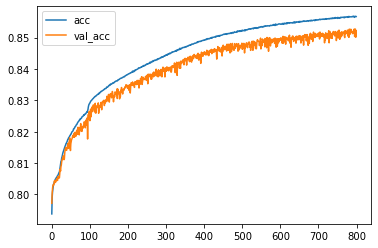

In [12]:
plt.plot(history.history["accuracy"], label="acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend();

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy: ", accuracy)
print("loss: ", loss)

25001/25001 [==============================] - 40s 2ms/step - loss: 0.3420 - accuracy: 0.8521
Accuracy:  0.8521325588226318
loss:  0.34203726053237915


In [ ]:
model.save_weights("fast_sim_MLP.h5")

# Full sim dataset

In [16]:
f_full_train = h5py.File("/global/ml4hep/spss/mfong/transfer_learning/train.h5", 'r')
f_full_test = h5py.File("/global/ml4hep/spss/mfong/transfer_learning/test.h5", 'r')

In [17]:
x_full = np.concatenate([f_full_train[k][:num_samples] for k in feature_keys], axis=1)
x_full.shape

(4000068, 600)

In [18]:
y_full = f_full_train["labels"][:num_samples]
y_full.shape

(4000068,)

In [19]:
x_full_train = x_full[:num_train_samples]
y_full_train = y_full[:num_train_samples]

x_full_test = x_full[num_train_samples:]
y_full_test = y_full[num_train_samples:]

In [20]:
scaler_full = StandardScaler()
scaler_full.fit(x_full_train)

x_full_train = scaler_full.transform(x_full_train)
x_full_test = scaler_full.transform(x_full_test)

## Fully Connected

In [21]:
model_full = Sequential()
model_full.add(Dense(64, input_shape=(600,), activation='relu'))
model_full.add(Dense(8, activation='relu'))
model_full.add(Dense(1, activation='sigmoid'))

In [22]:
model_full.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_full = model_full.fit(x_full_train, y_full_train, epochs=800, batch_size=256, shuffle=True, validation_data=(x_full_test, y_full_test))

Epoch 1/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5232 - accuracy: 0.7407 - val_loss: 0.5200 - val_accuracy: 0.7428
Epoch 2/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5152 - accuracy: 0.7451 - val_loss: 0.5148 - val_accuracy: 0.7451
Epoch 3/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5128 - accuracy: 0.7465 - val_loss: 0.5136 - val_accuracy: 0.7459
Epoch 4/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5111 - accuracy: 0.7473 - val_loss: 0.5133 - val_accuracy: 0.7459
Epoch 5/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5095 - accuracy: 0.7481 - val_loss: 0.5112 - val_accuracy: 0.7468
Epoch 6/800
12501/12501 [==============================] - 35s 3ms/step - loss: 0.5078 - accuracy: 0.7491 - val_loss: 0.5095 - val_accuracy: 0.7479
Epoch 7/800
12501/12501 [==============================] - 36s 3ms/step - loss: 0.5059 - accuracy: 0.7500 - val_

In [ ]:
plt.plot(history_full.history["accuracy"], label="acc")
plt.plot(history_full.history["val_accuracy"], label="val_acc")
plt.title("Full Sim MLP")
plt.legend();

In [ ]:
model_full.save_weights("full_sim_MLP.h5")

## Use pretrained weights on full sim

In [ ]:
model_pretrained = Sequential()
model_pretrained.add(Dense(64, input_shape=(600,), activation='relu'))
model_pretrained.add(Dense(8, activation='relu'))
model_pretrained.add(Dense(1, activation='sigmoid'))

In [ ]:
model_pretrained.load_weights("fast_sim_MLP.h5")

In [ ]:
model_pretrained.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_pretrained = model_pretrained.fit(x_full_train, y_full_train, epochs=800, batch_size=256, shuffle=True, validation_data=(x_full_test, y_full_test))

In [1]:
plt.plot(history_pretrained.history["accuracy"], label="acc")
plt.plot(history_pretrained.history["val_accuracy"], label="val_acc")
plt.title("Full Sim MLP Pretrained")
plt.legend();

NameError: name 'plt' is not defined

In [ ]:
plt.plot(history_pretrained.history["accuracy"], label="pre trained acc")
plt.plot(history_pretrained.history["val_accuracy"], label="pre trained val_acc")

plt.plot(history_full.history["accuracy"], label="full acc")
plt.plot(history_full.history["val_accuracy"], label="full val_acc")

plt.plot(history.history["accuracy"], label="fast acc")
plt.plot(history.history["val_accuracy"], label="fast val_acc")
plt.title("MLP Comparison")
plt.legend();

In [ ]:
# TODO
# pre train on full sim 4 mill - then take the next 4 mill train/validation

# try cos(phi) / sin(phi)
# try logE instead of E/pT, then standard scalar

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [128]:
print("Fast sim")
fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test))
print("Full sim")
fpr_full, tpr_full, thresholds_full = roc_curve(y_full_test, model_full.predict(x_full_test))
print("Full sim pretrained")
fpr_pretrained, tpr_pretrained, thresholds_pretrained = roc_curve(y_full_test, model_pretrained.predict(x_full_test))

Fast sim
Full sim
Full sim pretrained


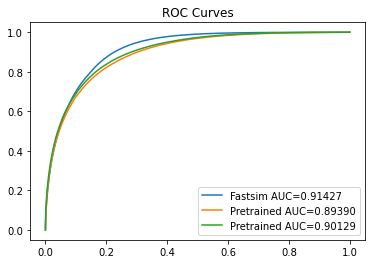

In [130]:
plt.plot(fpr, tpr, label="Fastsim AUC={0:.5f}".format(auc(fpr, tpr)))
plt.plot(fpr_full, tpr_full, label="Fullsim AUC={0:.5f}".format(auc(fpr_full, tpr_full)))
plt.plot(fpr_pretrained, tpr_pretrained, label="Pretrained AUC={0:.5f}".format(auc(fpr_pretrained, tpr_pretrained)))
plt.title("ROC Curves")
plt.legend();